<h4 class="text-center text-info"> Predicting Fraud Detection </h4>
<br>

<span class="badge"> Datasets </span>

In [1]:
#https://www.kaggle.com/mlg-ulb/creditcardfraud

<div class="jumbotron"> Loading Library </div>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette='rainbow')

<span class="badge"> Loading Dataset </span>

In [3]:
raw_data = pd.read_csv('creditcard.csv')

In [4]:
raw_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
raw_data.shape

(284807, 31)

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
raw_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
#creating a sample data for fast computation and analysis

In [9]:
data = raw_data.sample(frac=0.1,random_state=1)

In [11]:
data.shape,raw_data.shape

((28481, 31), (284807, 31))

In [12]:
#checking the distribution of values in each column

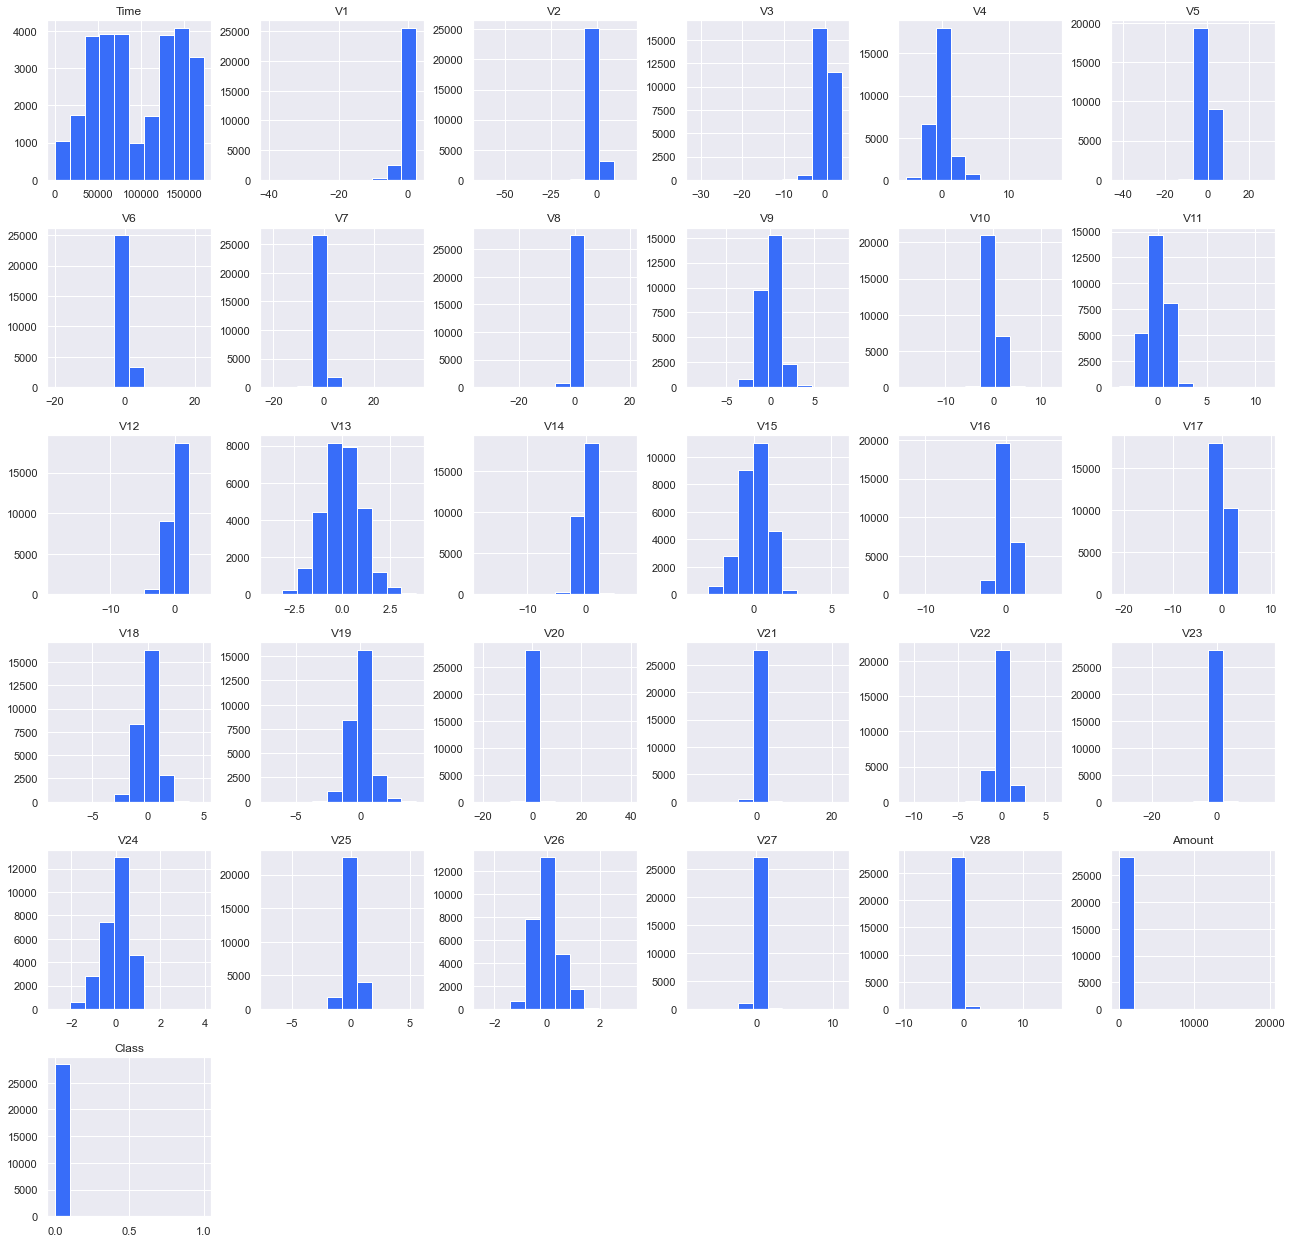

In [14]:
data.hist(figsize=(22,22))
plt.show()

In [15]:
#analysis target column which will determine if it's a fruad or not

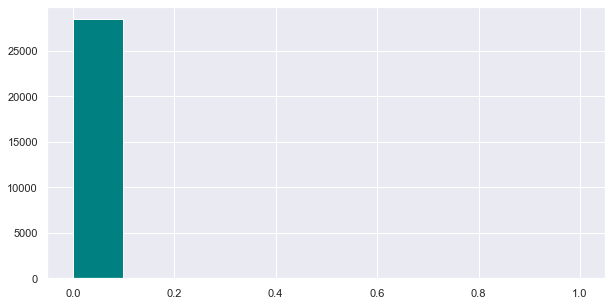

In [16]:
data['Class'].hist(figsize=(10,5),color='teal')
plt.show()

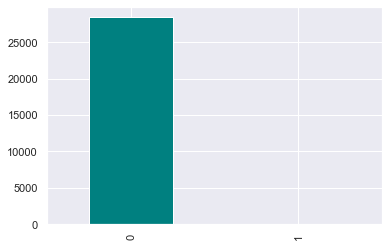

In [20]:

data['Class'].value_counts().plot(kind='bar',color=['teal','crimson']);

In [22]:
data['Class'].value_counts()

0    28432
1       49
Name: Class, dtype: int64

In [23]:
#there is only 49 fraud 

In [25]:
#creating a outlier fraction

In [26]:
valid_card = data[data['Class']==0]
fraud_card = data[data['Class']==1]

In [27]:
outlier_frac = len(fraud_card)/ float(len(valid_card))

In [28]:
outlier_frac

0.0017234102419808666

In [30]:
len(valid_card), len(fraud_card)

(28432, 49)

In [36]:
print(f'We have {round(outlier_frac * 100 ,2)}% outlier fraction.')

We have 0.17% outlier fraction.


In [37]:
#checking Co-relation

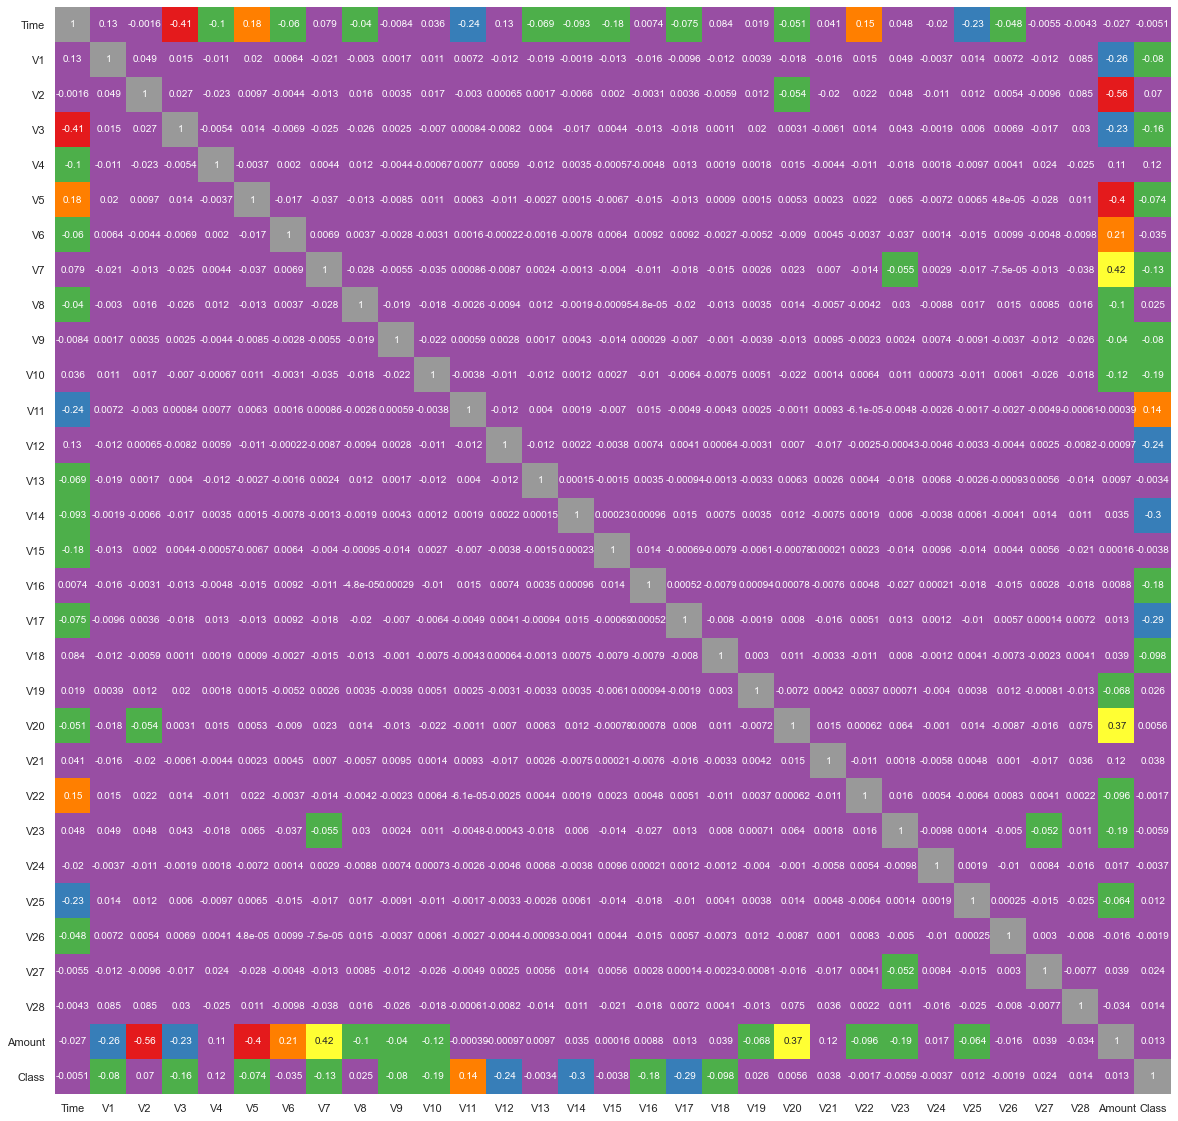

In [39]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),cmap='Set1',cbar=False,annot=True)
plt.show()

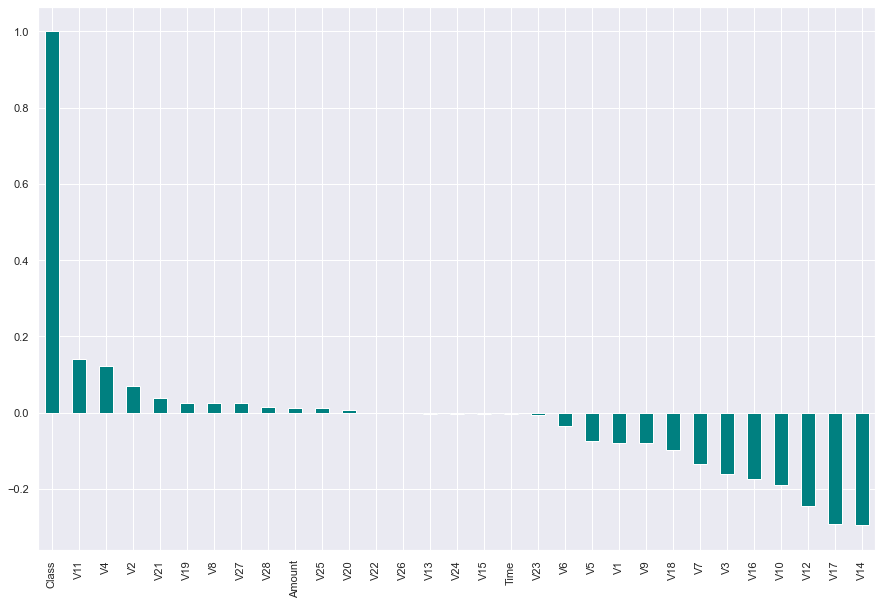

In [46]:
plt.figure(figsize=(15,10))
data.corr()['Class'].sort_values(ascending=False).plot(kind='bar',color='teal')
plt.show()

<span class="badge"> Creating Featured and Target </span>

In [47]:
featured_data = data.drop('Class',axis=1)
target_data = data['Class']

In [48]:
featured_data.shape, target_data.shape

((28481, 30), (28481,))

<h3 class="text-center text-danger"> Isolation Forest </h3>
<br>

In [49]:
from sklearn.ensemble import IsolationForest

In [50]:
forest_clf = IsolationForest(max_samples=len(featured_data),contamination=outlier_frac,random_state=1)

In [54]:
forest_clf.fit(featured_data)

IsolationForest(contamination=0.0017234102419808666, max_samples=28481,
                random_state=1)

In [56]:
forest_preds = forest_clf.predict(featured_data)

In [59]:
np.unique(forest_preds)

array([-1,  1])

<h3 class="text-center text-danger"> Local Outlier Factor </h3>
<br>

In [51]:
from sklearn.neighbors import LocalOutlierFactor

In [52]:
neighbor_clf = LocalOutlierFactor(n_neighbors=20,contamination=outlier_frac)

In [60]:
neighbor_clf.fit(featured_data)

LocalOutlierFactor(contamination=0.0017234102419808666)

In [62]:
neighbot_preds = neighbor_clf.fit_predict(featured_data)

In [64]:
np.unique(neighbot_preds)

array([-1,  1])

<h4 class="text-center text-info"> Classification Report </h4>
<br>

In [53]:
from sklearn.metrics import classification_report,accuracy_score,f1_score,recall_score

In [79]:
def report_info(model):
    y_preds = model.fit_predict(featured_data)
    y_preds[y_preds == 1]= 0
    y_preds[y_preds==-1]=1
    
    n_errors = (y_preds != target_data).sum()
    
    accuracy = accuracy_score(target_data,y_preds)
    recall = recall_score(target_data,y_preds)
    f1 = f1_score(target_data,y_preds)
    
    #classification report
    print(f'Total Error found: {n_errors}')
    print(f'Accuracy: {accuracy*100:.2f} %')
    print(f'Recall : {recall*100:.2f} %')
    print(f'F1 Score: {f1*100:.2f} %')
    print(classification_report(target_data,y_preds))
    

<span class="badge"> Isolation Forest </span>

In [80]:
report_info(forest_clf)

Total Error found: 71
Accuracy: 99.75 %
Recall : 28.57 %
F1 Score: 28.28 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.28      0.29      0.28        49

    accuracy                           1.00     28481
   macro avg       0.64      0.64      0.64     28481
weighted avg       1.00      1.00      1.00     28481



<span class="badge"> Neighbors </span>

In [81]:
report_info(neighbor_clf)

Total Error found: 97
Accuracy: 99.66 %
Recall : 2.04 %
F1 Score: 2.02 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.02      0.02      0.02        49

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481

